In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

### Step #1: Loading all the spectral data

In [2]:
#Init a data list:
data_list = []

#Loop over all the files in the data folder:
for file in os.listdir('data/'):
    #Check if the file is a csv file:
    if 'dsc_fc' in file and file.endswith('.csv'):
        #Read the csv file:
        spec_data = pd.read_csv("data/"+file, \
                                delimiter = ',', parse_dates=[0], \
                                    infer_datetime_format=True, na_values='0', \
                                        header = None)
        data_list.append(spec_data)

#Make a dataframe from the data list:
spectral_data = pd.concat(data_list, axis=0, ignore_index=True)

In [3]:
#Adding a datetime column:
spectral_data.columns = ['datetime'] + [i for i in range(spectral_data.shape[1] - 1)]
spectral_data

,datetime,0,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,50,51,52
0,2020-02-25 00:00:00,4.04158,-0.337277,0.278823,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25 00:01:00,4.02179,-0.469653,0.141173,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-25 00:02:00,3.98937,-0.655307,0.151470,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-25 00:03:00,3.89345,-0.966260,-0.149979,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-25 00:04:00,3.83742,-0.969013,-0.514656,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277435,2019-06-27 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3277436,2019-06-27 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3277437,2019-06-27 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3277438,2019-06-27 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Looking into the subset of data:
spectral_data.loc[:,:2]

,datetime,0,1,2
0,2020-02-25 00:00:00,4.04158,-0.337277,0.278823
1,2020-02-25 00:01:00,4.02179,-0.469653,0.141173
2,2020-02-25 00:02:00,3.98937,-0.655307,0.151470
3,2020-02-25 00:03:00,3.89345,-0.966260,-0.149979
4,2020-02-25 00:04:00,3.83742,-0.969013,-0.514656
...,...,...,...,...
3277435,2019-06-27 23:55:00,NaN,NaN,NaN
3277436,2019-06-27 23:56:00,NaN,NaN,NaN
3277437,2019-06-27 23:57:00,NaN,NaN,NaN
3277438,2019-06-27 23:58:00,NaN,NaN,NaN


### Step 2: Aggregating & pre-processing the data to 1 hour time scale:

In [5]:
#Group by 1 hour and taking the mean:
spectral_data['datetime'] = pd.to_datetime(spectral_data['datetime'], errors='coerce')  
agg_data = spectral_data.loc[:,:2].groupby(pd.Grouper(key='datetime', freq='1H')).mean().reset_index()

In [6]:
spectral_data

,datetime,0,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,50,51,52
0,2020-02-25 00:00:00,4.04158,-0.337277,0.278823,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25 00:01:00,4.02179,-0.469653,0.141173,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-25 00:02:00,3.98937,-0.655307,0.151470,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-25 00:03:00,3.89345,-0.966260,-0.149979,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-25 00:04:00,3.83742,-0.969013,-0.514656,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277435,2019-06-27 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3277436,2019-06-27 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3277437,2019-06-27 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3277438,2019-06-27 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Keep only the vector components and drop the na values:
agg_data = agg_data.dropna()

In [8]:
agg_data

,datetime,0,1,2
0,2016-01-01 00:00:00,5.733193,-2.296756,-13.282797
1,2016-01-01 01:00:00,4.668200,-1.917471,-12.976817
2,2016-01-01 02:00:00,2.898088,0.470586,-13.237948
3,2016-01-01 03:00:00,3.107440,0.077172,-12.819543
4,2016-01-01 04:00:00,3.387239,-2.777962,-11.102431
...,...,...,...,...
64291,2023-05-02 19:00:00,3.625422,3.330697,-1.425394
64292,2023-05-02 20:00:00,3.129382,3.551040,-1.273540
64293,2023-05-02 21:00:00,4.297767,3.180053,-1.004981
64294,2023-05-02 22:00:00,4.677120,3.084730,0.446979


### Step 3: Loading & pre-processing the indices data (containing ground truth)

In [9]:
#Let's load the indices data:
indices_data = pd.read_csv('data/dataset_2013_2023_normalised.csv',index_col=0)

In [10]:
indices_data

,Epoch,YR,Day,HR,Rot#,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
0,6.374506e+13,2020,1,0,2542,51,52,60,36,2.5,...,69.4,0.3,-6,9999,2,99999,99999,0.2,0.005875,0.0034
1,6.374506e+13,2020,1,1,2542,51,52,57,36,2.9,...,69.4,0.3,-1,9999,2,99999,99999,0.1,0.005875,0.0057
2,6.374506e+13,2020,1,2,2542,51,52,62,36,4.0,...,69.4,0.3,3,9999,2,99999,99999,0.2,0.005875,0.0102
3,6.374507e+13,2020,1,3,2542,51,52,57,35,5.3,...,69.4,0.0,5,9999,0,99999,99999,0.0,0.005875,0.0274
4,6.374507e+13,2020,1,4,2542,51,52,64,38,4.4,...,69.4,0.0,7,9999,0,99999,99999,-0.2,0.005875,0.0133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94135,6.374504e+13,2019,365,19,2542,51,52,60,36,4.0,...,68.2,1.3,-2,9999,5,99999,99999,0.4,0.006103,0.0071
94136,6.374504e+13,2019,365,20,2542,51,52,58,33,4.2,...,68.2,1.3,0,9999,5,99999,99999,0.5,0.006103,0.0086
94137,6.374505e+13,2019,365,21,2542,51,52,59,36,3.2,...,68.2,0.7,-1,9999,3,99999,99999,0.5,0.006103,0.0052
94138,6.374505e+13,2019,365,22,2542,51,52,58,35,2.7,...,68.2,0.7,-3,9999,3,99999,99999,0.4,0.006103,0.0040


In [11]:
#Let's make a column with all the date features combined:
indices_data['dkey'] = indices_data['YR'].astype(str) + '-' + \
                                          indices_data['Day'].astype(str) + '-' + \
                                              indices_data['HR'].astype(str)

In [12]:
indices_data.dkey

0           2020-1-0
1           2020-1-1
2           2020-1-2
3           2020-1-3
4           2020-1-4
            ...     
94135    2019-365-19
94136    2019-365-20
94137    2019-365-21
94138    2019-365-22
94139    2019-365-23
Name: dkey, Length: 94140, dtype: object

In [18]:
#Let's do the same for the spectral data:
agg_data['dkey'] = agg_data['datetime'].dt.year.astype(str) + '-' + agg_data['datetime'].dt.dayofyear.astype(str) + '-'\
    + agg_data['datetime'].dt.hour.astype(str)

In [19]:
agg_data.dkey

0           2016-1-0
1           2016-1-1
2           2016-1-2
3           2016-1-3
4           2016-1-4
            ...     
64291    2023-122-19
64292    2023-122-20
64293    2023-122-21
64294    2023-122-22
64295    2023-122-23
Name: dkey, Length: 54235, dtype: object

In [20]:
indices_data.dkey

0           2020-1-0
1           2020-1-1
2           2020-1-2
3           2020-1-3
4           2020-1-4
            ...     
94135    2019-365-19
94136    2019-365-20
94137    2019-365-21
94138    2019-365-22
94139    2019-365-23
Name: dkey, Length: 94140, dtype: object

### Step 4: Time to merge the two datasets

In [23]:
merged_data = agg_data.merge(indices_data, on='dkey')
merged_data

,datetime,0,1,2,dkey,Epoch,YR,Day,HR,Rot#,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
0,2016-01-01 00:00:00,5.733193,-2.296756,-13.282797,2016-1-0,6.361883e+13,2016,1,0,2488,...,95.1,6.0,-116,686,80,-679,8,4.4,0.007000,0.2497
1,2016-01-01 01:00:00,4.668200,-1.917471,-12.976817,2016-1-1,6.361883e+13,2016,1,1,2488,...,95.1,6.0,-114,574,80,-512,62,4.6,0.007000,0.6232
2,2016-01-01 02:00:00,2.898088,0.470586,-13.237948,2016-1-2,6.361883e+13,2016,1,2,2488,...,95.1,6.0,-102,788,80,-564,224,6.2,0.007000,0.4127
3,2016-01-01 03:00:00,3.107440,0.077172,-12.819543,2016-1-3,6.361884e+13,2016,1,3,2488,...,95.1,5.3,-98,710,56,-555,156,5.6,0.007000,0.2708
4,2016-01-01 04:00:00,3.387239,-2.777962,-11.102431,2016-1-4,6.361884e+13,2016,1,4,2488,...,95.1,5.3,-96,909,56,-672,237,4.5,0.007000,0.4906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54230,2023-05-02 19:00:00,3.625422,3.330697,-1.425394,2023-122-19,6.385027e+13,2023,122,19,2587,...,159.2,1.7,-23,9999,6,99999,99999,999.9,0.008897,0.0317
54231,2023-05-02 20:00:00,3.129382,3.551040,-1.273540,2023-122-20,6.385028e+13,2023,122,20,2587,...,159.2,1.7,-21,9999,6,99999,99999,999.9,0.008897,0.0300
54232,2023-05-02 21:00:00,4.297767,3.180053,-1.004981,2023-122-21,6.385028e+13,2023,122,21,2587,...,159.2,0.7,-19,9999,3,99999,99999,999.9,0.008897,0.0265
54233,2023-05-02 22:00:00,4.677120,3.084730,0.446979,2023-122-22,6.385028e+13,2023,122,22,2587,...,159.2,0.7,-17,9999,3,99999,99999,999.9,0.008897,0.0352


In [60]:
#Renaming the columns for better readability:
merged_data.rename(columns={0:'B_x', 1:'B_y', 2:'B_z'}, inplace=True)
merged_data

,datetime,B_x,B_y,B_z,dkey,Epoch,YR,Day,HR,Rot#,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
0,2016-01-01 00:00:00,5.733193,-2.296756,-13.282797,2016-1-0,6.361883e+13,2016,1,0,2488,...,95.1,6.0,-116,686,80,-679,8,4.4,0.007000,0.2497
1,2016-01-01 01:00:00,4.668200,-1.917471,-12.976817,2016-1-1,6.361883e+13,2016,1,1,2488,...,95.1,6.0,-114,574,80,-512,62,4.6,0.007000,0.6232
2,2016-01-01 02:00:00,2.898088,0.470586,-13.237948,2016-1-2,6.361883e+13,2016,1,2,2488,...,95.1,6.0,-102,788,80,-564,224,6.2,0.007000,0.4127
3,2016-01-01 03:00:00,3.107440,0.077172,-12.819543,2016-1-3,6.361884e+13,2016,1,3,2488,...,95.1,5.3,-98,710,56,-555,156,5.6,0.007000,0.2708
4,2016-01-01 04:00:00,3.387239,-2.777962,-11.102431,2016-1-4,6.361884e+13,2016,1,4,2488,...,95.1,5.3,-96,909,56,-672,237,4.5,0.007000,0.4906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54230,2023-05-02 19:00:00,3.625422,3.330697,-1.425394,2023-122-19,6.385027e+13,2023,122,19,2587,...,159.2,1.7,-23,9999,6,99999,99999,999.9,0.008897,0.0317
54231,2023-05-02 20:00:00,3.129382,3.551040,-1.273540,2023-122-20,6.385028e+13,2023,122,20,2587,...,159.2,1.7,-21,9999,6,99999,99999,999.9,0.008897,0.0300
54232,2023-05-02 21:00:00,4.297767,3.180053,-1.004981,2023-122-21,6.385028e+13,2023,122,21,2587,...,159.2,0.7,-19,9999,3,99999,99999,999.9,0.008897,0.0265
54233,2023-05-02 22:00:00,4.677120,3.084730,0.446979,2023-122-22,6.385028e+13,2023,122,22,2587,...,159.2,0.7,-17,9999,3,99999,99999,999.9,0.008897,0.0352


### Step 5: Split the data into training and testing:

We are going to use all of the data except 2023 to train and predict/test on 2023 data.

In [86]:
#Split the data into training and testing:
X_train = merged_data[merged_data.YR < 2023][['B_x', 'B_y', 'B_z']]
y_train = merged_data[merged_data.YR < 2023][['KP']]

X_test = merged_data[merged_data.YR == 2023][['B_x', 'B_y', 'B_z']]
y_test = merged_data[merged_data.YR == 2023][['KP']]

### Step 6: ML modeling

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Fit decision tree regressor
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)

clf.feature_importances_

array([0.29600525, 0.32767217, 0.37632258])

In [88]:
# Predict on test data:
y_pred = clf.predict(X_test)

# Calculate mean squared error:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean squared error: {mse}")

Mean squared error: 2.9336897847625556


In [91]:
X_test

,B_x,B_y,B_z
51308,-2.085095,3.091458,-0.219408
51309,-3.420303,0.107162,-0.242661
51310,-3.468633,1.239118,-1.044004
51311,-2.962970,1.347251,-0.280227
51312,-2.963932,2.924057,1.367531
...,...,...,...
54230,3.625422,3.330697,-1.425394
54231,3.129382,3.551040,-1.273540
54232,4.297767,3.180053,-1.004981
54233,4.677120,3.084730,0.446979


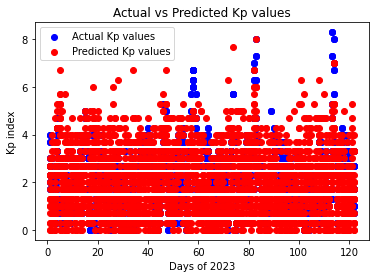

In [96]:
# assume y_test and y_pred are your test target variable and predicted values

# plot actual vs predicted values
plt.scatter(merged_data[merged_data.YR == 2023]['Day'], y_test, color='blue', label='Actual Kp values')
plt.scatter(merged_data[merged_data.YR == 2023]['Day'], y_pred, color='red', label='Predicted Kp values')
plt.xlabel('Days of 2023')
plt.ylabel('Kp index')
plt.title('Actual vs Predicted Kp values')
plt.legend()
plt.show()

### Plotting the relationship of B_z and Kp:

The data does suggest some correlation between the B_z and Kp.

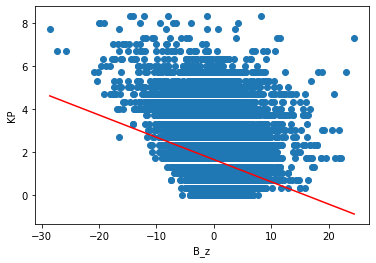

In [84]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Plot the feature against the target variable
plt.scatter(merged_data.loc[:, 'B_z'], merged_data.loc[:,'KP'])
plt.xlabel('B_z')
plt.ylabel('KP')

# Fit linear regression model
X = merged_data.loc[:, 'B_z'].values.reshape(-1, 1)
y = merged_data.loc[:, 'KP'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

# Calculate regression line
x_line = np.linspace(np.min(X), np.max(X), 100)
y_line = reg.predict(x_line.reshape(-1, 1))

# plot regression line
plt.plot(x_line, y_line, c='r')

In [101]:
from scipy.stats import pearsonr

# Assume merged_data is your data
# Assume 'B_z' and 'KP' are the names of the two variables you want to check

# Compute Pearson correlation between two variables
corr, p_value = pearsonr(merged_data['B_z'], merged_data['KP'])

print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

Pearson correlation: -0.20971575473275636
P-value: 0.0


There exists a small negative correlation (of -0.21) between B_z and Kp.